# 9-13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

# Kaggle: 2019 2nd ML month with KaRK

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Competition-background" data-toc-modified-id="Competition-background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Competition background</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#File-descriptions" data-toc-modified-id="File-descriptions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>File descriptions</a></span></li><li><span><a href="#Data-fields" data-toc-modified-id="Data-fields-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data fields</a></span></li><li><span><a href="#Declaration" data-toc-modified-id="Declaration-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Declaration</a></span></li><li><span><a href="#Data-Explorer" data-toc-modified-id="Data-Explorer-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Data Explorer</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Data preprocessing</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#RMSE" data-toc-modified-id="RMSE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RMSE</a></span></li><li><span><a href="#Average-Blending" data-toc-modified-id="Average-Blending-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Average Blending</a></span></li></ul></li><li><span><a href="#Submission" data-toc-modified-id="Submission-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

## Competition background

내 집 마련의 꿈은 누구나 가지고 있습니다. 하지만 집의 가격은 누구나 알고 있지는 않죠. 집의 가격은 주거 공간의 면적, 위치, 경관, 건물의 연식 등 여러 가지 복잡한 요인의 조합에 의해 결정됩니다. 이번에 분석하실 데이터는 20개의 변수를 가지고 있으며, 어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것을 목표로 합니다. 이번 대회는 리더보드 점수뿐만 아니라 캐글의 공유 정신의 기본인 커널 작성을 장려하는 목표를 가지고 있습니다.

## Evaluation

**RMSE(Root Mean Squared Error) = ${\sqrt{ {1 \over N} \sum{(yt - y{pr})}^2}}$**

## Data

### File descriptions

- train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
- test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
- sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.

### Data fields

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 집의 가격(Target variable)
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트(면적)
7. sqft_lot : 부지의 평방 피트(면적)
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트(면적)
14. sqft_basement : 지하실의 평방 피트(면적)
15. yr_built : 지어진 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### Declaration

In [1]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

import os
from os.path import join

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import missingno as msno  # 결측치 확인
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
random_state = 0

### Data Explorer

**Load data**

In [4]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_path = join(data_dir, 'train.csv')
test_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(f'train data dim : {train.shape}')
print(f'test data dim : {test.shape}')  # price가 없다.

train data dim : (15035, 21)
test data dim : (6468, 20)


**Remove labels from train**

In [5]:
# price column을 y로 이동
y = train['price']
del train['price']

train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Combine train and test**

In [6]:
# train의 개수를 저장해둔다.
train_len = len(train)

# data = train + test
data = pd.concat((train, test), axis=0)

print(len(data))

21503


In [7]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### Data preprocessing

**Check for missing values**

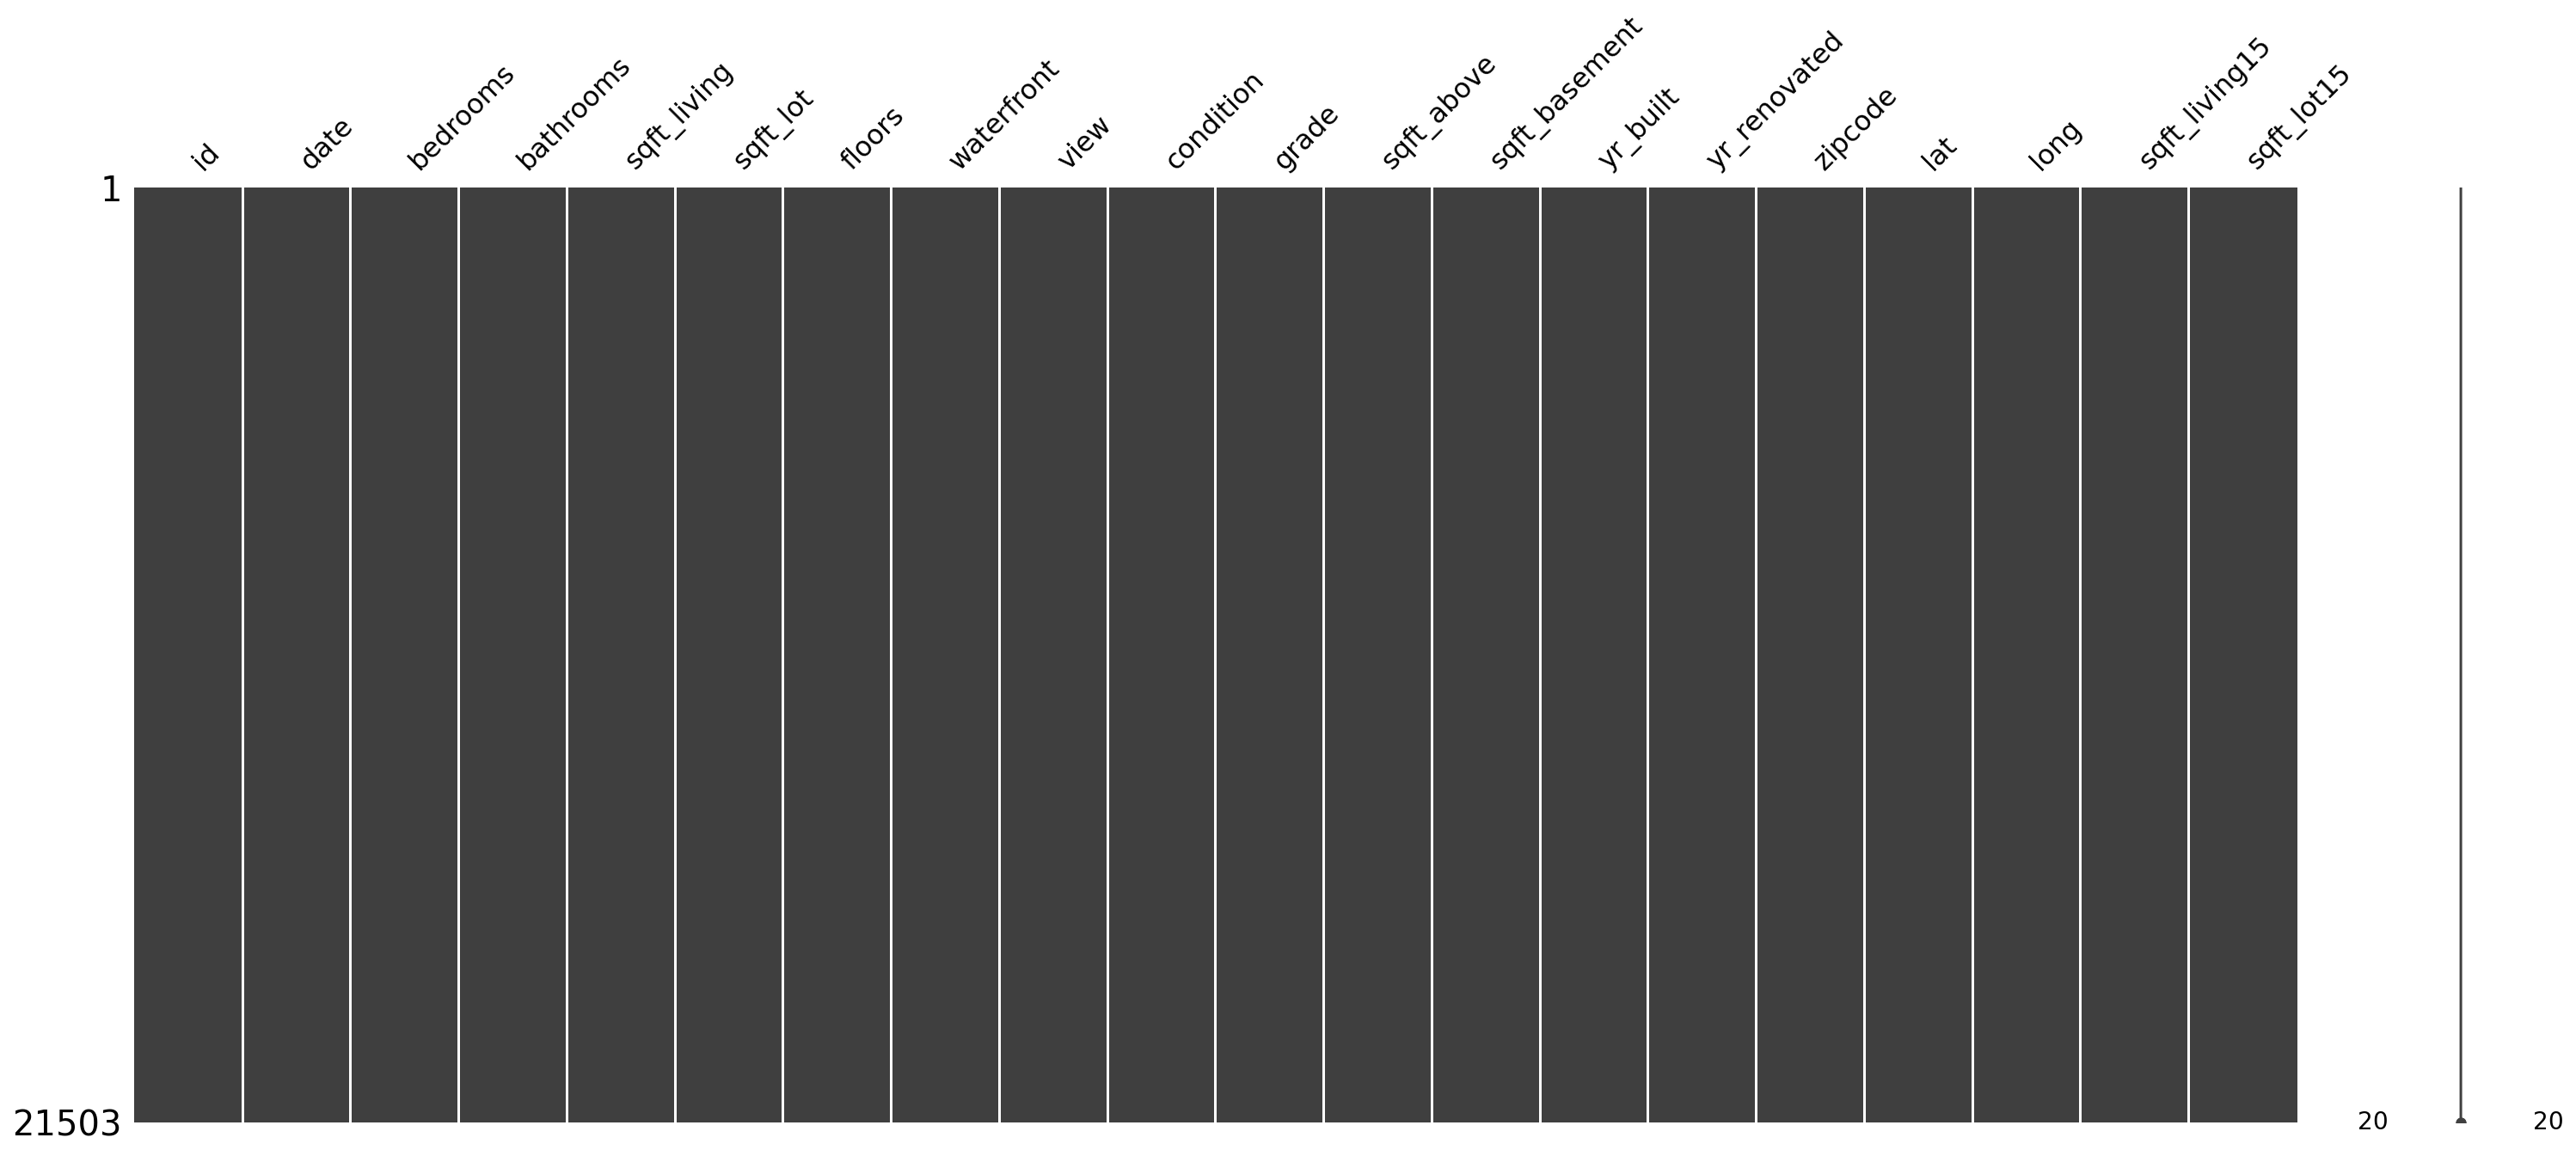

In [8]:
msno.matrix(data)  # 결측치 시각화

In [9]:
# 결측치 확인
for column in data.columns:
    print(f'{column}: {len(data.loc[pd.isnull(data[column]), column].values)}')

id: 0
date: 0
bedrooms: 0
bathrooms: 0
sqft_living: 0
sqft_lot: 0
floors: 0
waterfront: 0
view: 0
condition: 0
grade: 0
sqft_above: 0
sqft_basement: 0
yr_built: 0
yr_renovated: 0
zipcode: 0
lat: 0
long: 0
sqft_living15: 0
sqft_lot15: 0


**Remove unnecessary variables**

In [10]:
# test의 id를 따로 저장해둔다.
test_id = data['id'][train_len:]
# id column을 제거
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


**date column**

In [11]:
data['date'] = data['date'].apply(lambda x: str(x[:6])).astype(int)

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


**Check the distribution of each variable**

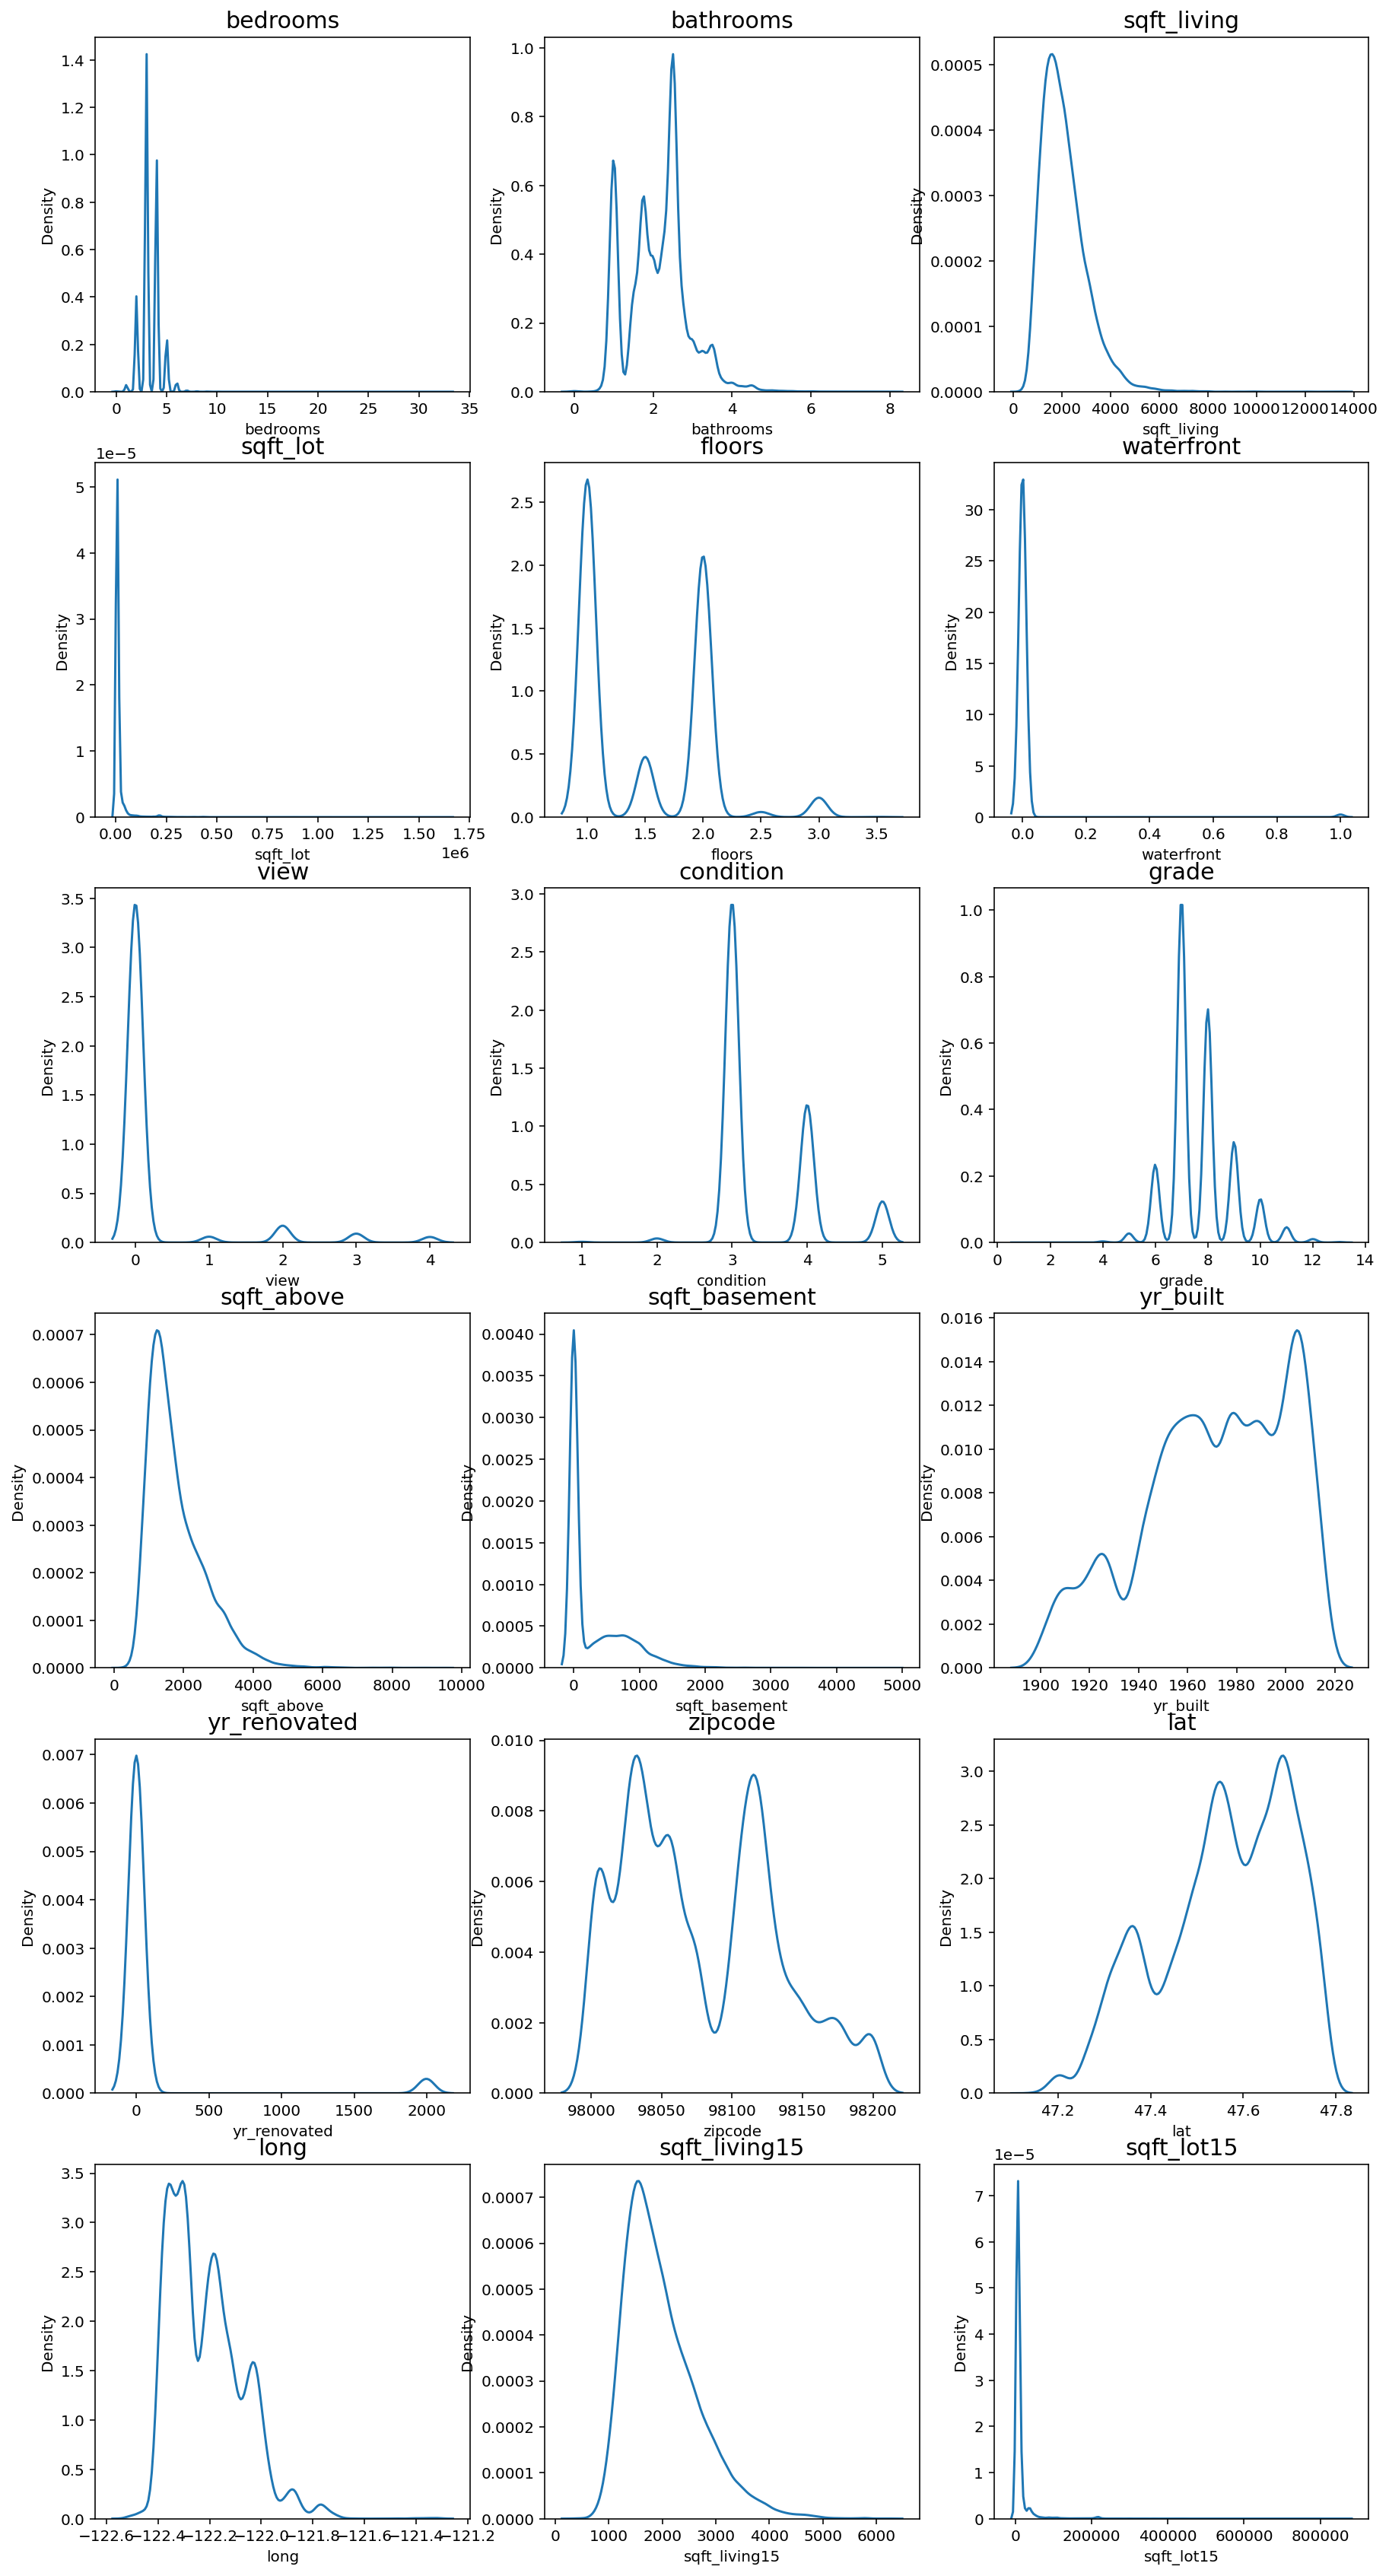

In [12]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))

# date를 제외한 변수들의 분포
count = 1
columns = data.columns
for row in range(6):
    for col in range(3):
        if count == 19:
            break
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1

**log scailing**

In [13]:
skew_columns = ['bedrooms', 'sqft_living',
                'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

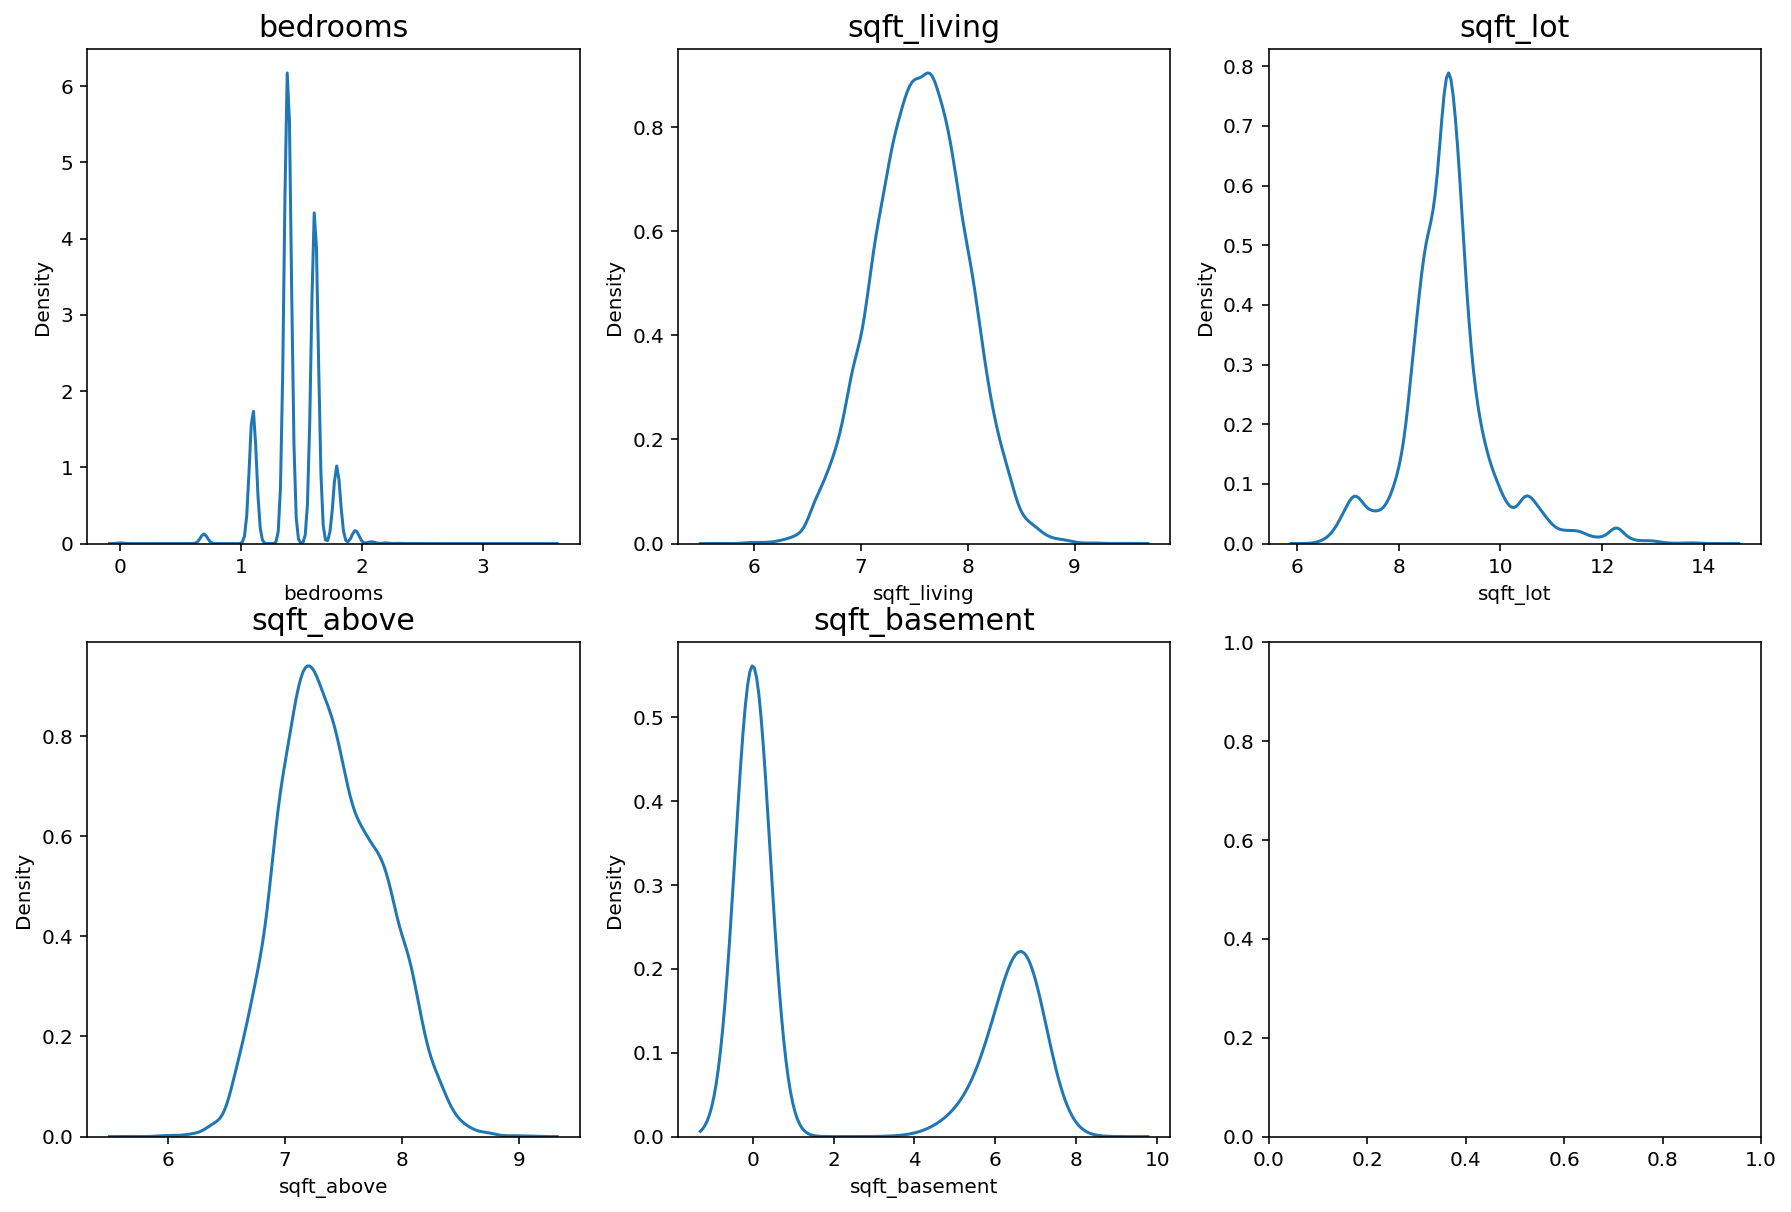

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

count = 0
for row in range(2):
    for col in range(3):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

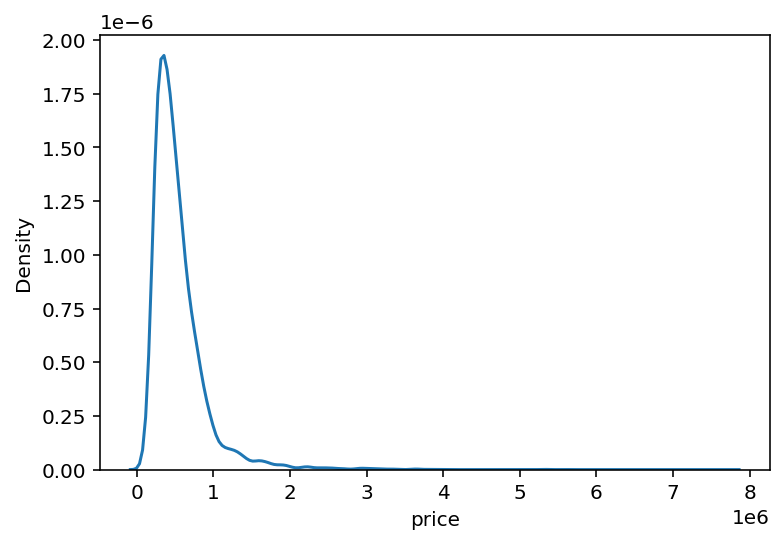

In [15]:
sns.kdeplot(y)
plt.show()

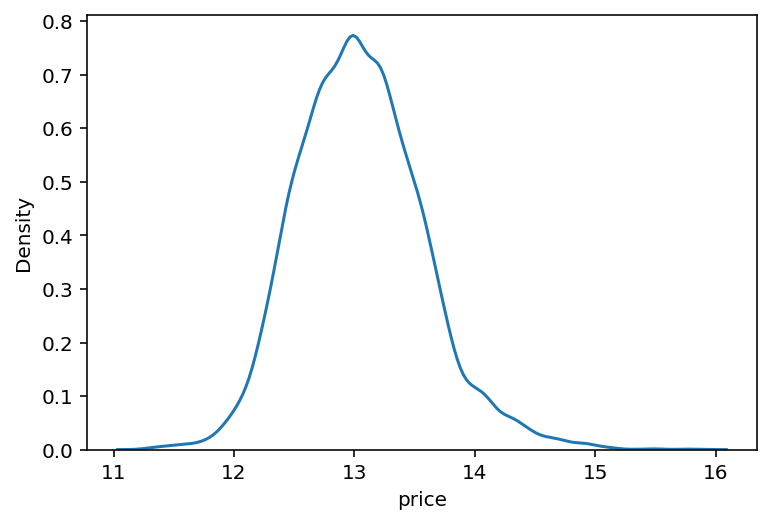

In [16]:
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

**Dividing the data**

In [17]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

print(train.shape)
print(test.shape)

(15035, 19)
(6468, 19)


## Models

In [50]:
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
gboost = GradientBoostingRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [xgboost, lightgbm, gboost, rdforest]

### Cross Validation

In [51]:
def get_cv_score(models, X, y):
    kfold = KFold(n_splits=5, random_state=random_state).get_n_splits(X.values)
    for m in models:
        print("Model {} CV score: {:.4f}".format(m.__class__.__name__,
                                                 np.mean(cross_val_score(m, X.values, y, cv=kfold))))

In [52]:
get_cv_score(models, train, y)

Model XGBRegressor CV score: 0.8973
Model LGBMRegressor CV score: 0.9025
Model GradientBoostingRegressor CV score: 0.8796
Model RandomForestRegressor CV score: 0.8854


### RMSE

In [18]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [20]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(
            train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values(
            'RMSE', ascending=False)

    return score_df

In [21]:
get_scores(models, train, y)

,RMSE
RandomForestRegressor,135960.339014
GradientBoostingRegressor,130681.072008
LGBMRegressor,117930.636570
XGBRegressor,116419.423897


### Average Blending

In [46]:
def AveragingBlending(models, X, y, test):
    for m in models:
        m['model'].fit(X.values, y)

    predictions = np.column_stack([
        m['model'].predict(test.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [47]:
y_pred = AveragingBlending(models, train, y, test)
print(len(y_pred))
y_pred

6468


array([13.12927564, 13.01556948, 14.09955975, ..., 13.03453944,
       12.72104699, 12.99443378])

## Submission

In [48]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [49]:
result = pd.DataFrame({
    'id': test_id,
    'price': y_pred
})

result.head()

,id,price
0,15035,13.129276
1,15036,13.015569
2,15037,14.099560
3,15038,12.630398
4,15039,12.677001


In [53]:
def save_submission(model_name, prediction, rmse=None):
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}.csv'.format(data_dir, model_name)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [54]:
save_submission('blending', y_pred)

/home/aiffel-dj61/aiffel/kaggle_kakr_housing/data/submission_blending.csv saved!
